# Infosys SpringBoard Task 1
In this notebook, we will explore various data visualization techniques and handle missing values in a dataset. We will use Python libraries such as Pandas, Seaborn, and Matplotlib to visualize the data and preprocess it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats

# Load the Dataset
We will begin by loading the dataset and inspecting the first few rows.

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Imputation Of Missing Values
We check for missing values of the dataset

In [3]:
df.isnull().sum()  # Check missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Observations
There are missing values in `Item_Weight` and `Outlet_Size`.

# Handling Missing Values

* Fill missing `Item_Weight` values by the median weight within each `Item_Type`.
* Fill missing `Outlet_Size` using the mode based on `Outlet_Type`.

In [4]:
# Filling missing Item_Weight values
df['Item_Weight'] = df.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.median()))

# Filling missing Outlet_Size values
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))


In [5]:
# Verifying no missing values
df.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Feature Encoding
Feature encoding was performed on both nominal and ordinal features in the dataset. This converts categorical values into numerical labels, making the data compatible with machine learning models.

In [6]:
# Nominal columns (categorical without order)
nominal_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']

# Ordinal columns (categorical with order)
ordinal_columns = ['Outlet_Size']

# Continuous (Numerical columns)
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year']

# Printing them separately
print("Nominal Columns: ", nominal_columns)
print("Ordinal Columns: ", ordinal_columns)
print("Numerical Columns: ", numerical_columns)

Nominal Columns:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']
Ordinal Columns:  ['Outlet_Size']
Numerical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year']


In [7]:
# Define the mapping for the ordinal column 'Outlet_Size'
outlet_size_mapping = ['Small', 'Medium', 'High']


In [8]:
# Creating encoders and scaler
ohe = OneHotEncoder(sparse_output=False)  # For nominal columns
ordinal = OrdinalEncoder(categories=[outlet_size_mapping])  # For ordinal column
scaler = StandardScaler()  # For numerical columns

In [10]:
# Creating the column transformer
ct = ColumnTransformer(
    transformers=[
        ('ohe', ohe, ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']),  # Nominal columns
        ('ordinal', ordinal, ['Outlet_Size']),  # Ordinal column
        ('scaler', scaler, ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'])  # Numerical columns
    ],
    remainder='passthrough'  # Keep the remaining columns as they are
)

# Setting the output for transformers to 'pandas'
ct.set_output(transform='pandas')


ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(sparse_output=False),
                                 ['Item_Identifier', 'Item_Fat_Content',
                                  'Item_Type', 'Outlet_Identifier',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['Small', 'Medium',
                                                             'High']]),
                                 ['Outlet_Size']),
                                ('scaler', StandardScaler(),
                                 ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                                  'Outlet_Establishment_Year',
                                  'Item_Outlet_Sales'])])

In [25]:
# Applying the transformation on the dataset
df_encoded = ct.fit_transform(df)

# Check the encoded DataFrame
print(df_encoded)

      ohe__Item_Identifier_DRA12  ohe__Item_Identifier_DRA24  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         0.0   
...                          ...                         ...   
8518                         0.0                         0.0   
8519                         0.0                         0.0   
8520                         0.0                         0.0   
8521                         0.0                         0.0   
8522                         0.0                         0.0   

      ohe__Item_Identifier_DRA59  ohe__Item_Identifier_DRB01  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0       

# Feature Derivation
To create a new feature called Outlet_Age by calculating the age of the store from the year it was established (Outlet_Establishment_Year):

In [28]:
# Creating the 'Outlet_Age' feature based on the current year (2024)
df['Outlet_Age'] = 2024 - df['Outlet_Establishment_Year']

# Check the new feature alongside the establishment year
print(df[['Outlet_Establishment_Year', 'Outlet_Age']].head())

   Outlet_Establishment_Year  Outlet_Age
0                       1999          25
1                       2009          15
2                       1999          25
3                       1998          26
4                       1987          37


# Outlier Detection

* Using Z-score method : 
The Z-score method for outlier detection is a statistical technique used to identify data points that are significantly different from the mean of a dataset. It is based on the standardization of data, using the Z-score formula to measure how many standard deviations a data point is from the mean.

Here’s how you can implement outlier detection using the z-score method in Python, including handling the continuous columns and visualizing the outliers using boxplots.

In [31]:
# Define Continuous columns
continuous_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']


In [32]:
# Z-Score threshold for detecting outliers
z_threshold = 2.5

In [35]:
# Dictionary to hold outliers for each column
outliers_dict = {}

# Loop over each continuous column to calculate z-scores and find outliers
for col in continuous_columns:
    # Calculate the z-score for the column
    df[col + '_zscore'] = np.abs((df[col] - df[col].mean()) / df[col].std())
    
    # Detect outliers where z-score is greater than the threshold
    outliers_dict[col] = df[df[col + '_zscore'] > z_threshold]

    # Print the number of outliers detected
    print(f"{col}: {outliers_dict[col].shape[0]} outliers detected.")


Item_Weight: 0 outliers detected.
Item_Visibility: 146 outliers detected.
Item_MRP: 0 outliers detected.
Item_Outlet_Sales: 197 outliers detected.


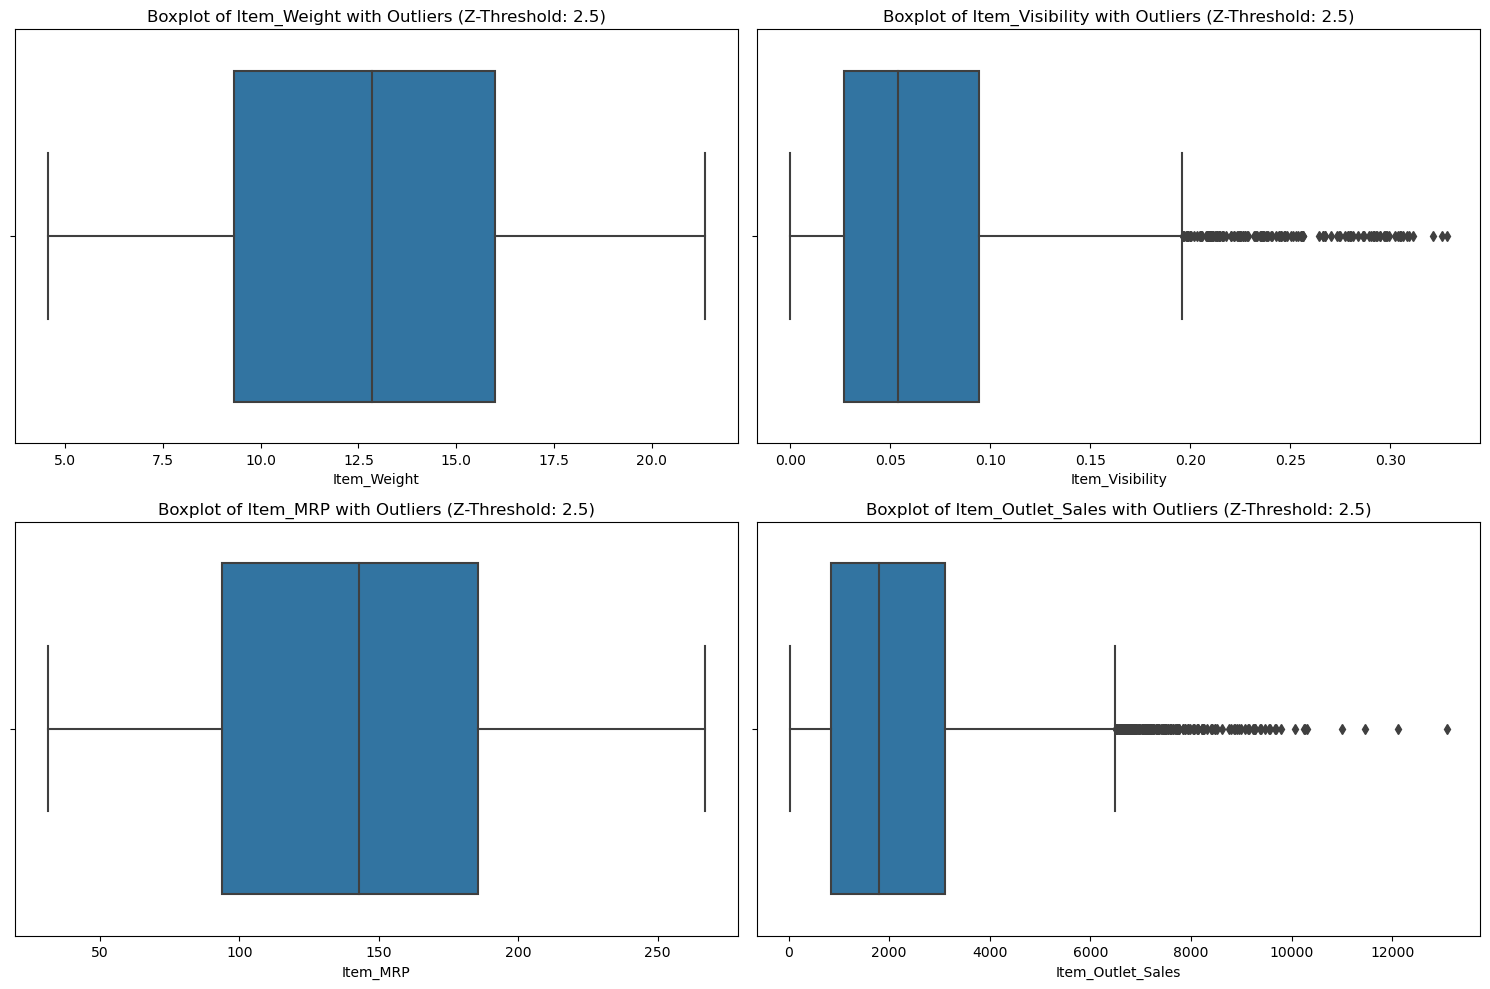

In [38]:
# Create a 2x2 grid of boxplots for the continuous columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(continuous_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} with Outliers (Z-Threshold: {z_threshold})')

# Adjust the layout
plt.tight_layout()
plt.show()


#  Remove Outliers

In [39]:
# Removing rows where Z-score for 'Item_Outlet_Sales' is greater than the threshold
outliers_removed = df[df['Item_Outlet_Sales_zscore'] < z_threshold]

# Print the original and new dataset sizes
print(f"Original dataset size: {df.shape}")
print(f"Dataset size after removing outliers: {outliers_removed.shape}")


Original dataset size: (8523, 17)
Dataset size after removing outliers: (8326, 17)


* Using the `IQR Method` for Outlier Detection

* The IQR (Interquartile Range) method is another common approach to detect and remove outliers. Here's how you can apply it:

In [42]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Checking for outliers in numerical columns
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
outliers = {}

for col in numerical_cols:
    outliers[col] = detect_outliers_iqr(df, col)
    print(f"Outliers detected in {col}: {len(outliers[col])}")


Outliers detected in Item_Weight: 0
Outliers detected in Item_Visibility: 144
Outliers detected in Item_MRP: 0
Outliers detected in Item_Outlet_Sales: 186


In [47]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Item_Outlet_Sales'].quantile(0.25)
Q3 = df['Item_Outlet_Sales'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers using IQR method
outliers_removed_iqr = df[(df['Item_Outlet_Sales'] >= lower_bound) & (df['Item_Outlet_Sales'] <= upper_bound)]

# Print dataset size after removing outliers using IQR
print(f"Dataset size after removing outliers using IQR: {outliers_removed_iqr.shape}")

Dataset size after removing outliers using IQR: (8337, 17)


* Assuming `outliers_removed` is cleaned dataset

In [48]:
# Columns to be standardized
scaled_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

In [50]:
# Initialize the scaler
scaler = StandardScaler()

# Standardize the specified columns and assign the result back to the dataframe correctly
outliers_removed.loc[:, scaled_columns] = scaler.fit_transform(outliers_removed[scaled_columns])

# Check the head of the updated DataFrame
print(outliers_removed.head())


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15    -0.823778          Low Fat        -0.971109   
1           DRC01    -1.615975          Regular        -0.908784   
2           FDN15     1.098121          Low Fat        -0.957359   
3           FDX07     1.496564          Regular        -1.280664   
4           NCD19    -0.910498          Low Fat        -1.280664   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  1.800763            OUT049   
1            Soft Drinks -1.476024            OUT018   
2                   Meat  0.041710            OUT049   
3  Fruits and Vegetables  0.699815            OUT010   
4              Household -1.385102            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [51]:
# Replacing 'df' with the cleaned dataset 'outliers_removed'
df = outliers_removed

# Display the first 4 rows of the updated dataset
print(df.head(4))


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15    -0.823778          Low Fat        -0.971109   
1           DRC01    -1.615975          Regular        -0.908784   
2           FDN15     1.098121          Low Fat        -0.957359   
3           FDX07     1.496564          Regular        -1.280664   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  1.800763            OUT049   
1            Soft Drinks -1.476024            OUT018   
2                   Meat  0.041710            OUT049   
3  Fruits and Vegetables  0.699815            OUT010   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Outlet_Age 

# Feature Scaling

* Apply Min-Max Scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max Scaling to 'Item_MRP' and 'Item_Visibility' and replace the values in the original DataFrame using .loc[]
df.loc[:, ['Item_MRP', 'Item_Visibility']] = min_max_scaler.fit_transform(df[['Item_MRP', 'Item_Visibility']])

# Check the scaled data
print(df[['Item_MRP', 'Item_Visibility']].head())

   Item_MRP  Item_Visibility
0  0.927507         0.048866
1  0.072068         0.058705
2  0.468288         0.051037
3  0.640093         0.000000
4  0.095805         0.000000


# Target Variable Transformation

We will plot the distribution of the target variable Item_Outlet_Sales before and after applying transformations. The target variable is highly skewed, and we aim to make it more normally distributed.

* Step 1 : Investigate the Distribution of `Item_Outlet_Sales`

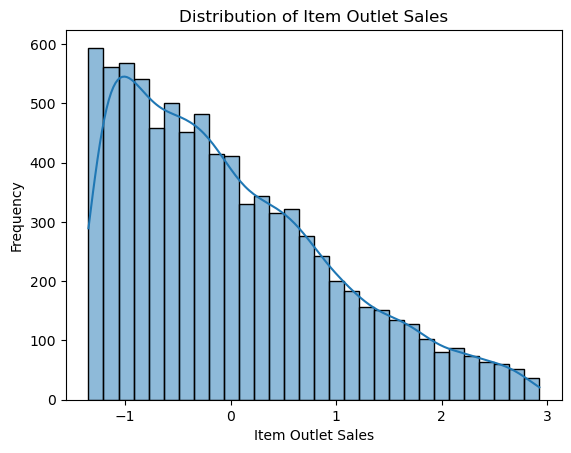

In [69]:
# Investigate the distribution of Item Outlet Sales
sns.histplot(df['Item_Outlet_Sales'], kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

* Step 2: Implementing log transformation with value adjusment

In [62]:
# Check the minimum value in the 'Item_Outlet_Sales' column
min_value = df['Item_Outlet_Sales'].min()
print(f"Minimum value in 'Item_Outlet_Sales': {min_value}")

Minimum value in 'Item_Outlet_Sales': -1.3482320684310651


In [64]:
# If the minimum value is negative, shift the values to make all positive
if min_value <= 0:
    shift_value = abs(min_value) + 1  # Shift to make all values positive
    df['Item_Outlet_Sales_Shifted'] = df['Item_Outlet_Sales'] + shift_value

    # Apply log transformation
    df['Item_Outlet_Sales_Log'] = np.log(df['Item_Outlet_Sales_Shifted'])
else:
    # If there are no negative values, just apply log transformation
    data['Item_Outlet_Sales_Log'] = np.log(df['Item_Outlet_Sales'])

* Step 3: Check Distribution After Transformation

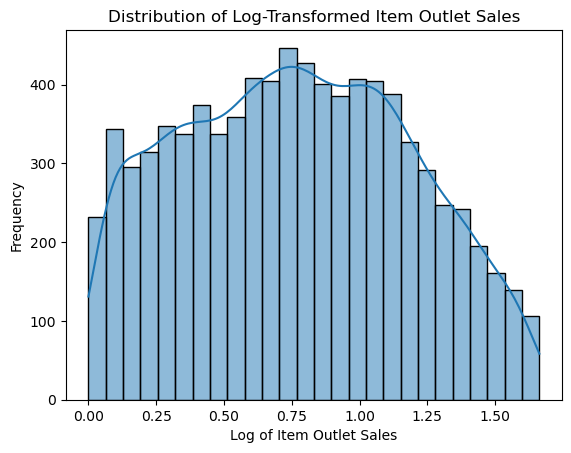

In [71]:
# Check distribution after log transformation
sns.histplot(df['Item_Outlet_Sales_Log'], kde=True)
plt.title('Distribution of Log-Transformed Item Outlet Sales')
plt.xlabel('Log of Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

In [73]:
# Display transformed data
df[['Item_Outlet_Sales', 'Item_Outlet_Sales_Shifted', 'Item_Outlet_Sales_Log']].head()

,Item_Outlet_Sales,Item_Outlet_Sales_Shifted,Item_Outlet_Sales_Log
0,1.122235,3.470467,1.244289
1,-1.074526,1.273706,0.241931
2,0.029187,2.377419,0.866015
3,-0.881687,1.466545,0.382909
4,-0.706622,1.641611,0.495678


In [17]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
